# TREND WITH ALL TEMPLATES


### ENERGY ERROR

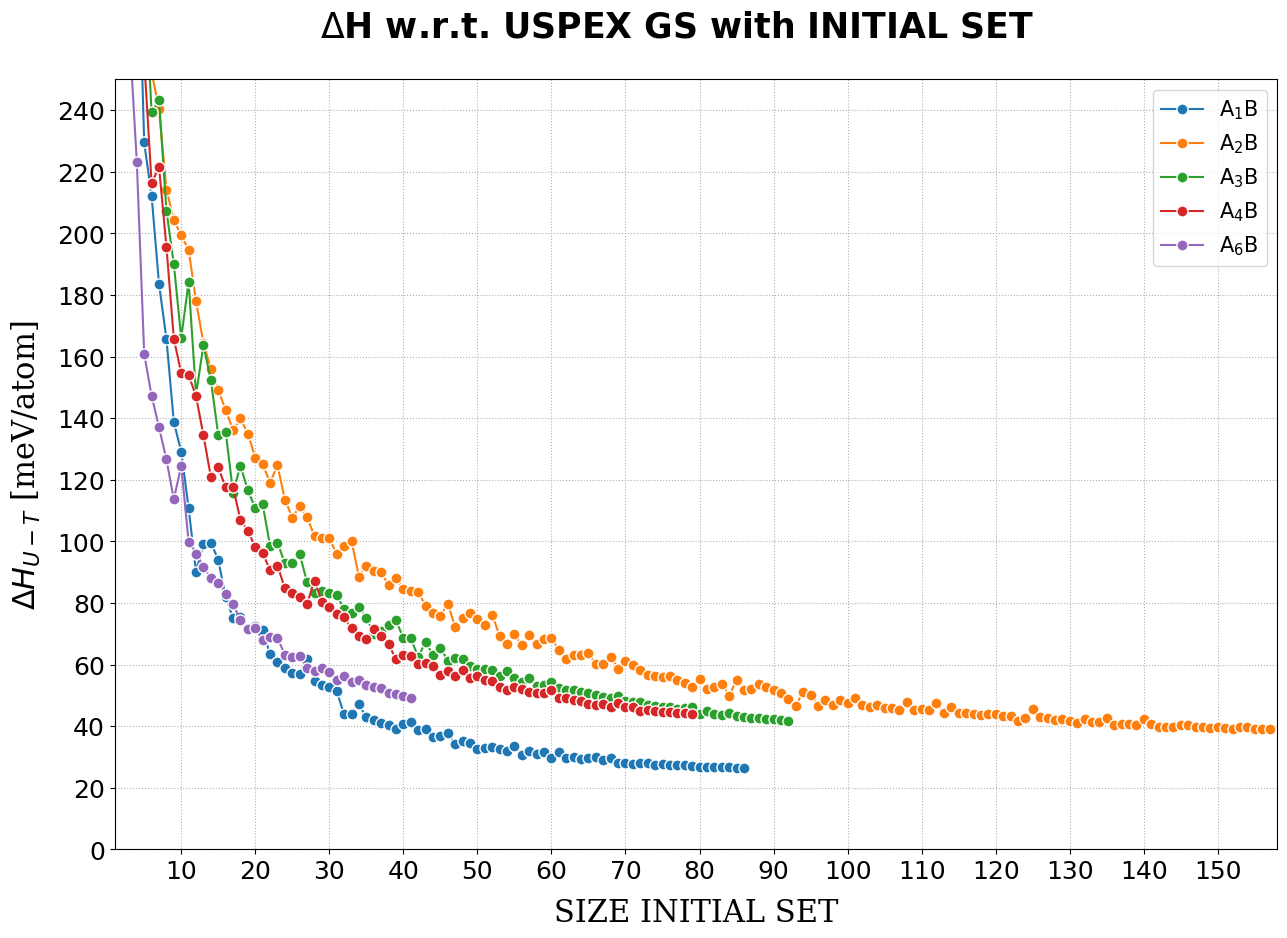

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './HvsINIT/'

title = r'$\Delta$H w.r.t. USPEX GS with INITIAL SET'
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=25, y=0.95, fontweight='bold')
max_x_ticks = np.array([])

complist = [1,2,3,4,6]
for comp in complist:
    dir_name = f'{comp}'
    df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStaticsBefore.csv', header=None, na_filter=False, index_col = 0)
    tot = (df_tot.to_numpy()).T * 1000

    x = np.arange(1, len(tot[0])+1) 

    ax.plot(x, tot[0] , marker = 'o', markeredgecolor='white', markersize=8, label=f'A$_{comp}$B')
    max_x_ticks = np.append(max_x_ticks, len(tot[0]))

ax.set_ylabel(r'$\Delta H_{U-T}$ [meV/atom]', fontsize=22, labelpad=10, family='serif')
step = 20
y_ticks  = np.arange(0,250,step, dtype=float)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'{i:.0f}' for i in y_ticks], fontsize=18)
ax.set_ylim(0,250)

ax.set_xlabel('SIZE INITIAL SET', fontsize=22, labelpad=10, family='serif')
xticks = np.arange(0, max(max_x_ticks)+1, 10)
ax.set_xticks(xticks)
ax.set_xlim(1,max(max_x_ticks)+1)
ax.set_xticklabels([f'{i:.0f}' for i in xticks], fontsize=18)

ax.grid(True, ls=':')
ax.legend(loc='upper right', fontsize=15)

plt.show()
fig.savefig('FIG/INIT_H.png', bbox_inches="tight")


### SIZE FINAL SET

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './HvsINIT/'

complist = [1, 2, 3, 4]

title = f'SIZE FINAL SET with threshold 0.9'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=20, y=0.95, fontweight='bold')

max_x_ticks = np.array([])

for comp in complist:
    dir_name = f'{comp}'
    df_numtemp = pd.read_csv(mother_dir + f'{dir_name}/NumberTempRedu.csv', header=None, na_filter = False, index_col = 0)
    numtemp = (df_numtemp.to_numpy()).T
    x = np.arange(1, len(numtemp[0])+1)

    ax.plot(x, numtemp[0], marker = 'o', markeredgecolor='white', markersize=6, label=f'A$_{comp}$B')
    max_x_ticks = np.append(max_x_ticks, len(numtemp[0]))

ax.set_ylabel('Size final set', fontsize=22)
ax.yaxis.set_label_coords(-0.07, 0.5)

step = 2
y_ticks  = np.arange(0,30,step, dtype=float)
y_ticks = np.round(y_ticks, decimals=0)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'{i:.0f}' for i in y_ticks], fontsize=18)
ax.set_ylim(0,30)

ax.set_xlabel('Size initial set', fontsize=22)
ax.xaxis.set_label_coords(0.5, -0.10)

xticks = np.arange(1, max(max_x_ticks)+1, 5)
xticks = np.round(xticks, decimals=0) 
ax.set_xticks(xticks)
ax.set_xlim(0,max(max_x_ticks)+1)
ax.set_xticklabels([f'{i:.0f}' for i in xticks], fontsize=15, rotation=45)

ax.grid(True, ls=':')
ax.legend(loc='lower right', fontsize=15)

plt.show()
fig.savefig('FIG/INIT_Ntemp.png', bbox_inches="tight")


### STD ENERGY

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './HvsINIT/'

title = f'$\Delta$H w.r.t. USPEX GS with INITIAL SET'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=20, y=0.95, fontweight='bold')
max_x_ticks = np.array([])

complist = [1,2,3,4]
for comp in complist:
    dir_name = f'{comp}'
    df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStaticsBefore.csv', header=None, na_filter=False, index_col = 0)
    tot = (df_tot.to_numpy()).T

    x = np.arange(1, len(tot[1])+1) 

    ax.plot(x, tot[1] , marker = 'o', markeredgecolor='white', markersize=6, label=f'A$_{comp}$B')
    max_x_ticks = np.append(max_x_ticks, len(tot[1]))


ax.set_ylabel(r'$\Delta$H [eV/atom]', fontsize=22)
ax.yaxis.set_label_coords(-0.07, 0.5)

step = 0.005
y_ticks  = np.arange(0.0,0.1,step, dtype=float)
y_ticks = np.round(y_ticks, decimals=2)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'{i:.3f}' for i in y_ticks], fontsize=18)
ax.set_ylim(0,0.1)

ax.set_xlabel('Size initial set', fontsize=22)
ax.xaxis.set_label_coords(0.5, -0.10)

xticks = np.arange(1, max(max_x_ticks)+1, 5)
xticks = np.round(xticks, decimals=0) 
ax.set_xticks(xticks)
ax.set_xlim(0,max(max_x_ticks)+1)
ax.set_xticklabels([f'{i:.0f}' for i in xticks], fontsize=15, rotation=45)

ax.grid(True, ls=':')
ax.legend(loc='upper right', fontsize=15)

plt.show()
fig.savefig('FIG/INIT_std.png', bbox_inches="tight")


# TEMPLATE ANALYSIS

### BEST TEMPLATES

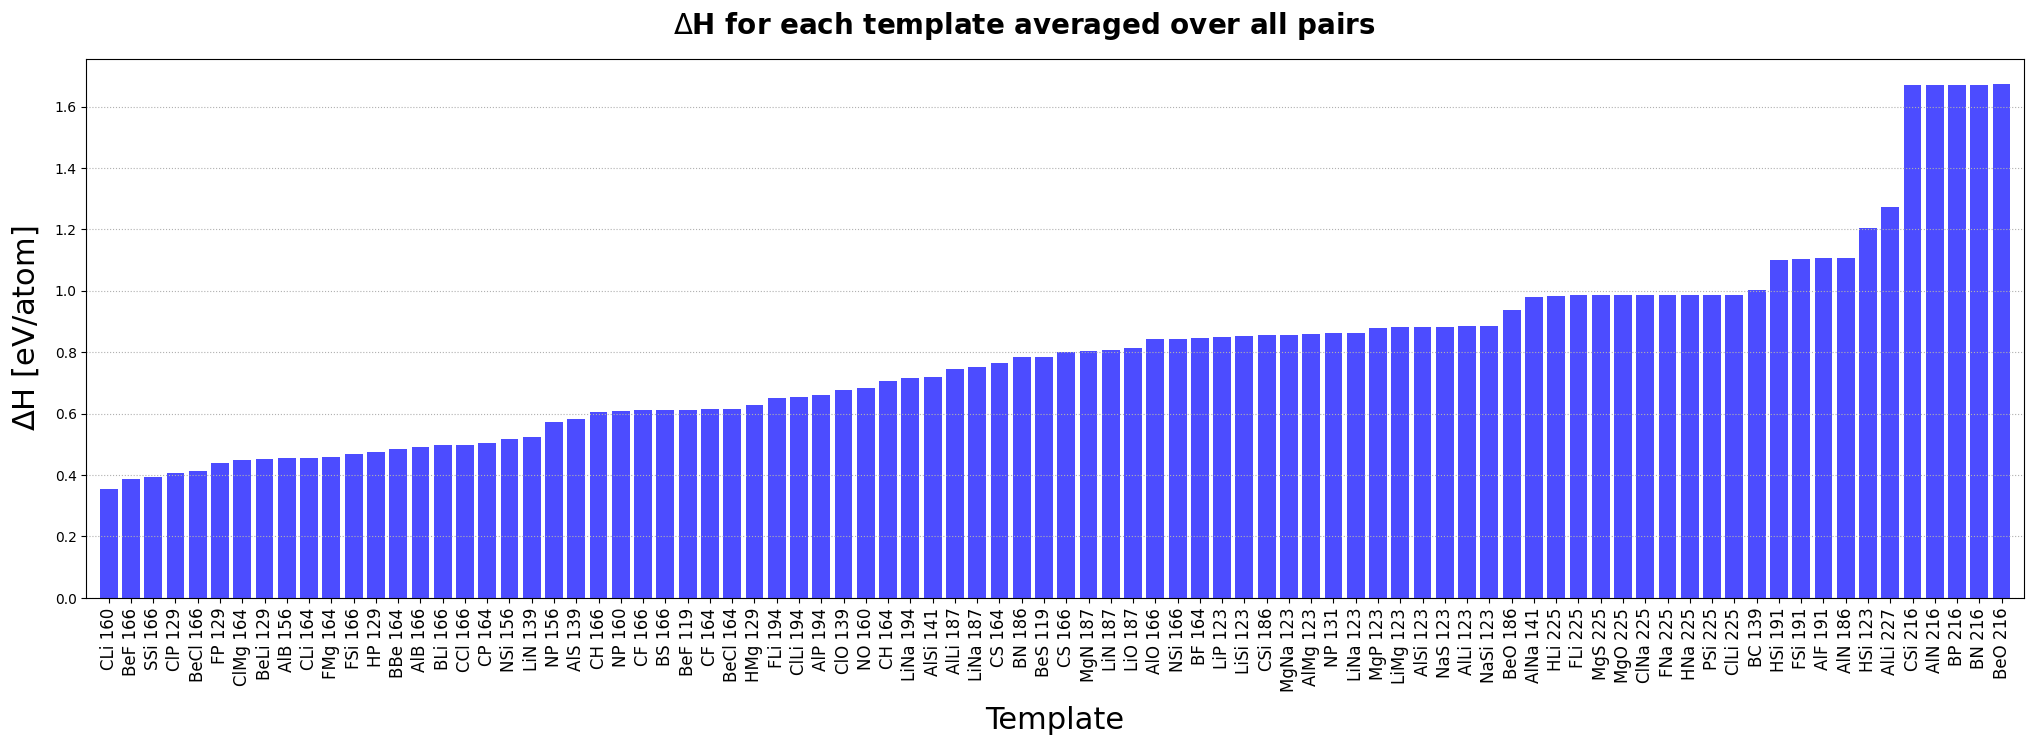

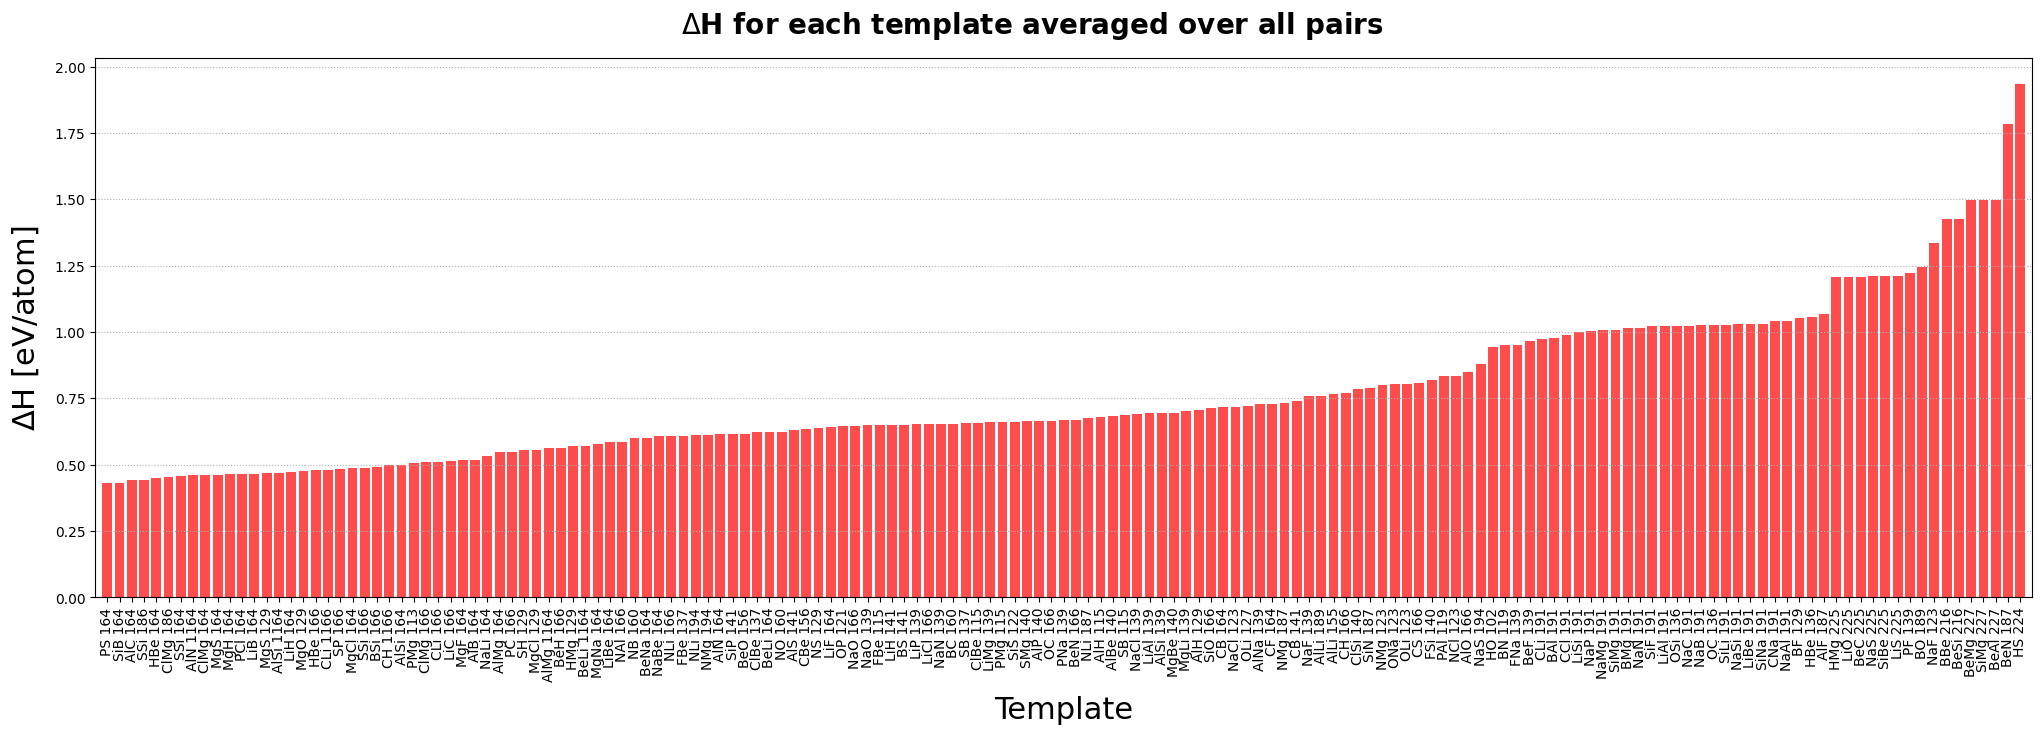

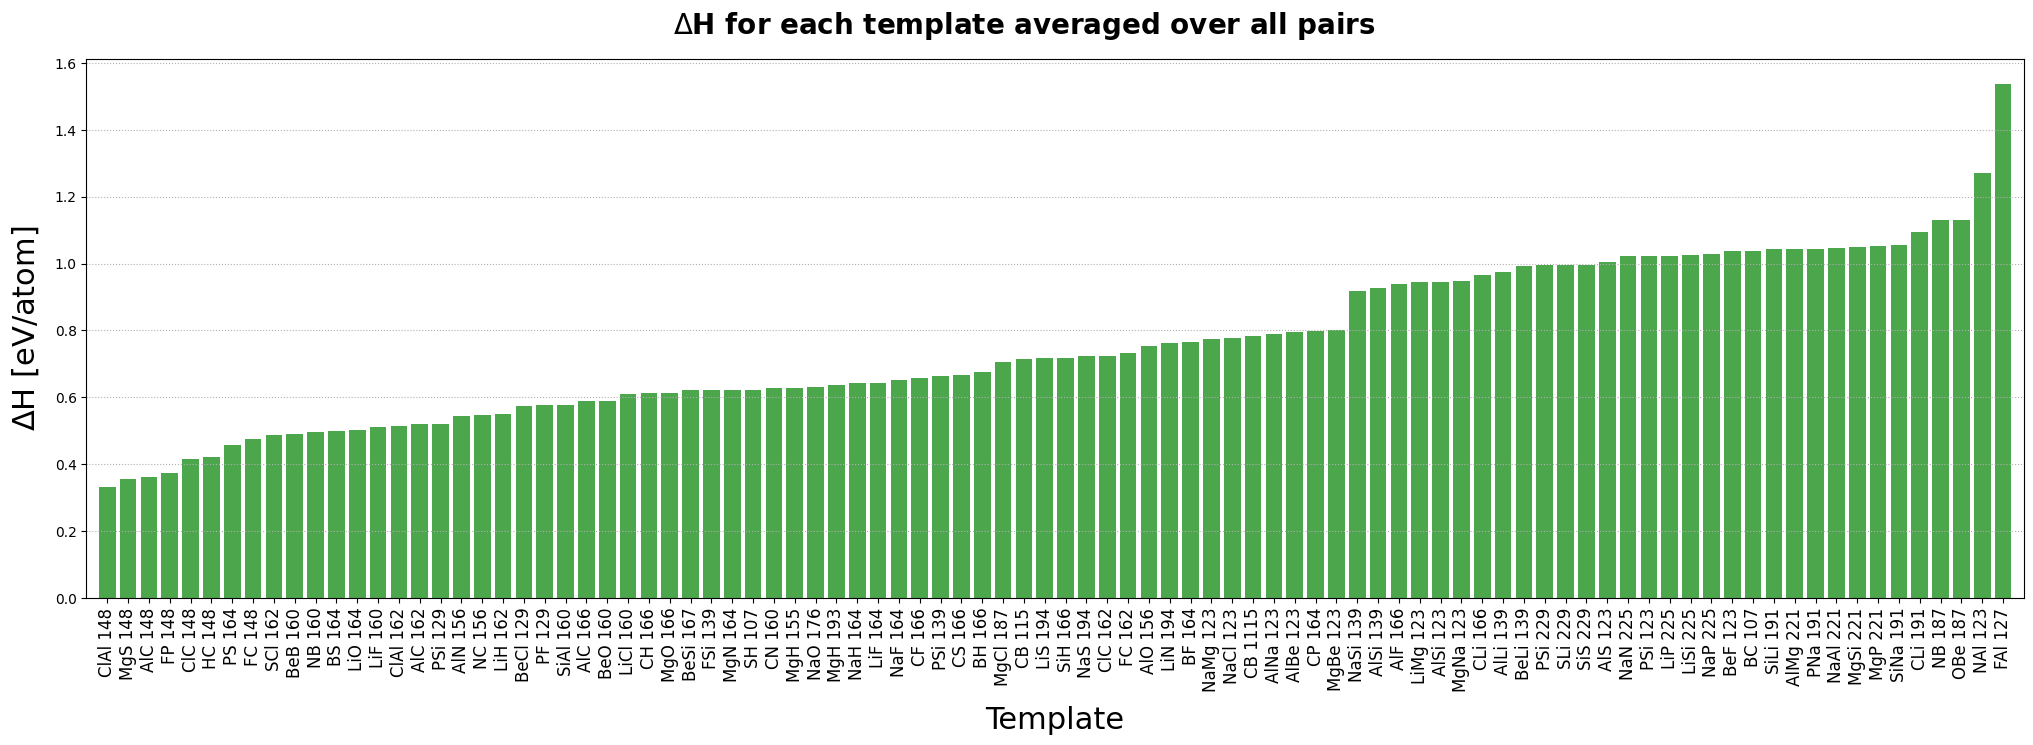

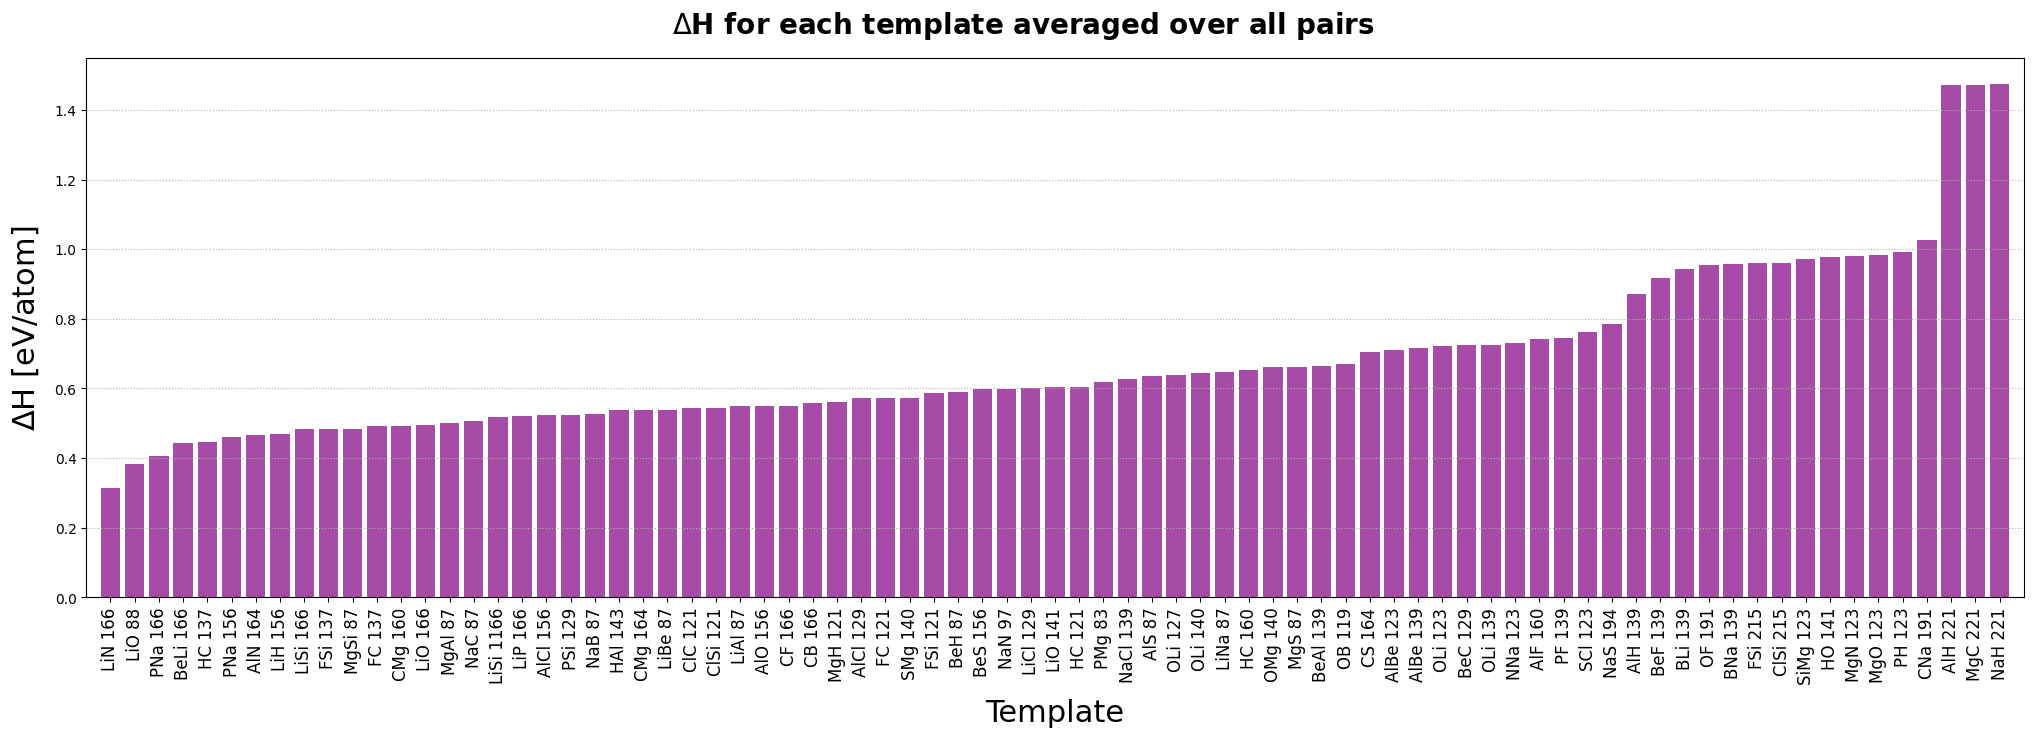

In [23]:
import json
import matplotlib.pyplot as plt

color_list = ['blue', 'red', 'green', 'purple']
comp_list = [1,2,3,4]

for idx, comp in enumerate(comp_list):
    if comp == 1:
        num_pairs = 105
    else:
        num_pairs = 210
    with open(f'ENTHALPY/A{comp}B.json', 'r') as f:
        data = json.load(f)

    with open(f'ENTHALPY/EntGS.json', 'r') as f:
        gs_dict = json.load(f)

    title = r'$\Delta$H for each template averaged over all pairs'
    fig, ax = plt.subplots(1, 1, figsize=(25, 7))

    temp_dict = {}

    count = 0
    for pair in data.keys():
        count +=1
        for temp in data[pair].keys():
            if temp not in temp_dict.keys():
                temp_dict[temp] = (data[pair][temp] - gs_dict[f'{comp}'][pair])/num_pairs
            else:
                temp_dict[temp] += (data[pair][temp] - gs_dict[f'{comp}'][pair])/num_pairs
    
    # Ordina i template in base ai valori delle entalpie
    sorted_items = sorted(temp_dict.items(), key=lambda x: x[1])  
    sorted_keys, sorted_values = zip(*sorted_items)  # Divide in due liste ordinate


    fig.suptitle(title, fontsize=20, y=0.95, fontweight='bold')
    ax.bar(sorted_keys, sorted_values, color=color_list[idx], alpha=0.7)
    ax.set_ylabel(r'$\Delta$H [eV/atom]', fontsize=22, labelpad=10)

    ax.set_xlim(-1, len(temp_dict.keys()))
    ax.set_xlabel('Template', fontsize=22, labelpad=10)
    ax.set_xticks(range(len(sorted_keys)))
    fontsize = 12
    if comp == 2:
        fontsize = 10
    ax.set_xticklabels([f'{i.split("_")[0]} {i.split("_")[1]}' for i in sorted_keys], fontsize=fontsize, rotation=90)


    ax.grid(True, ls=':', axis='y')





### ADAPTABILITY OVER TEMPLATES

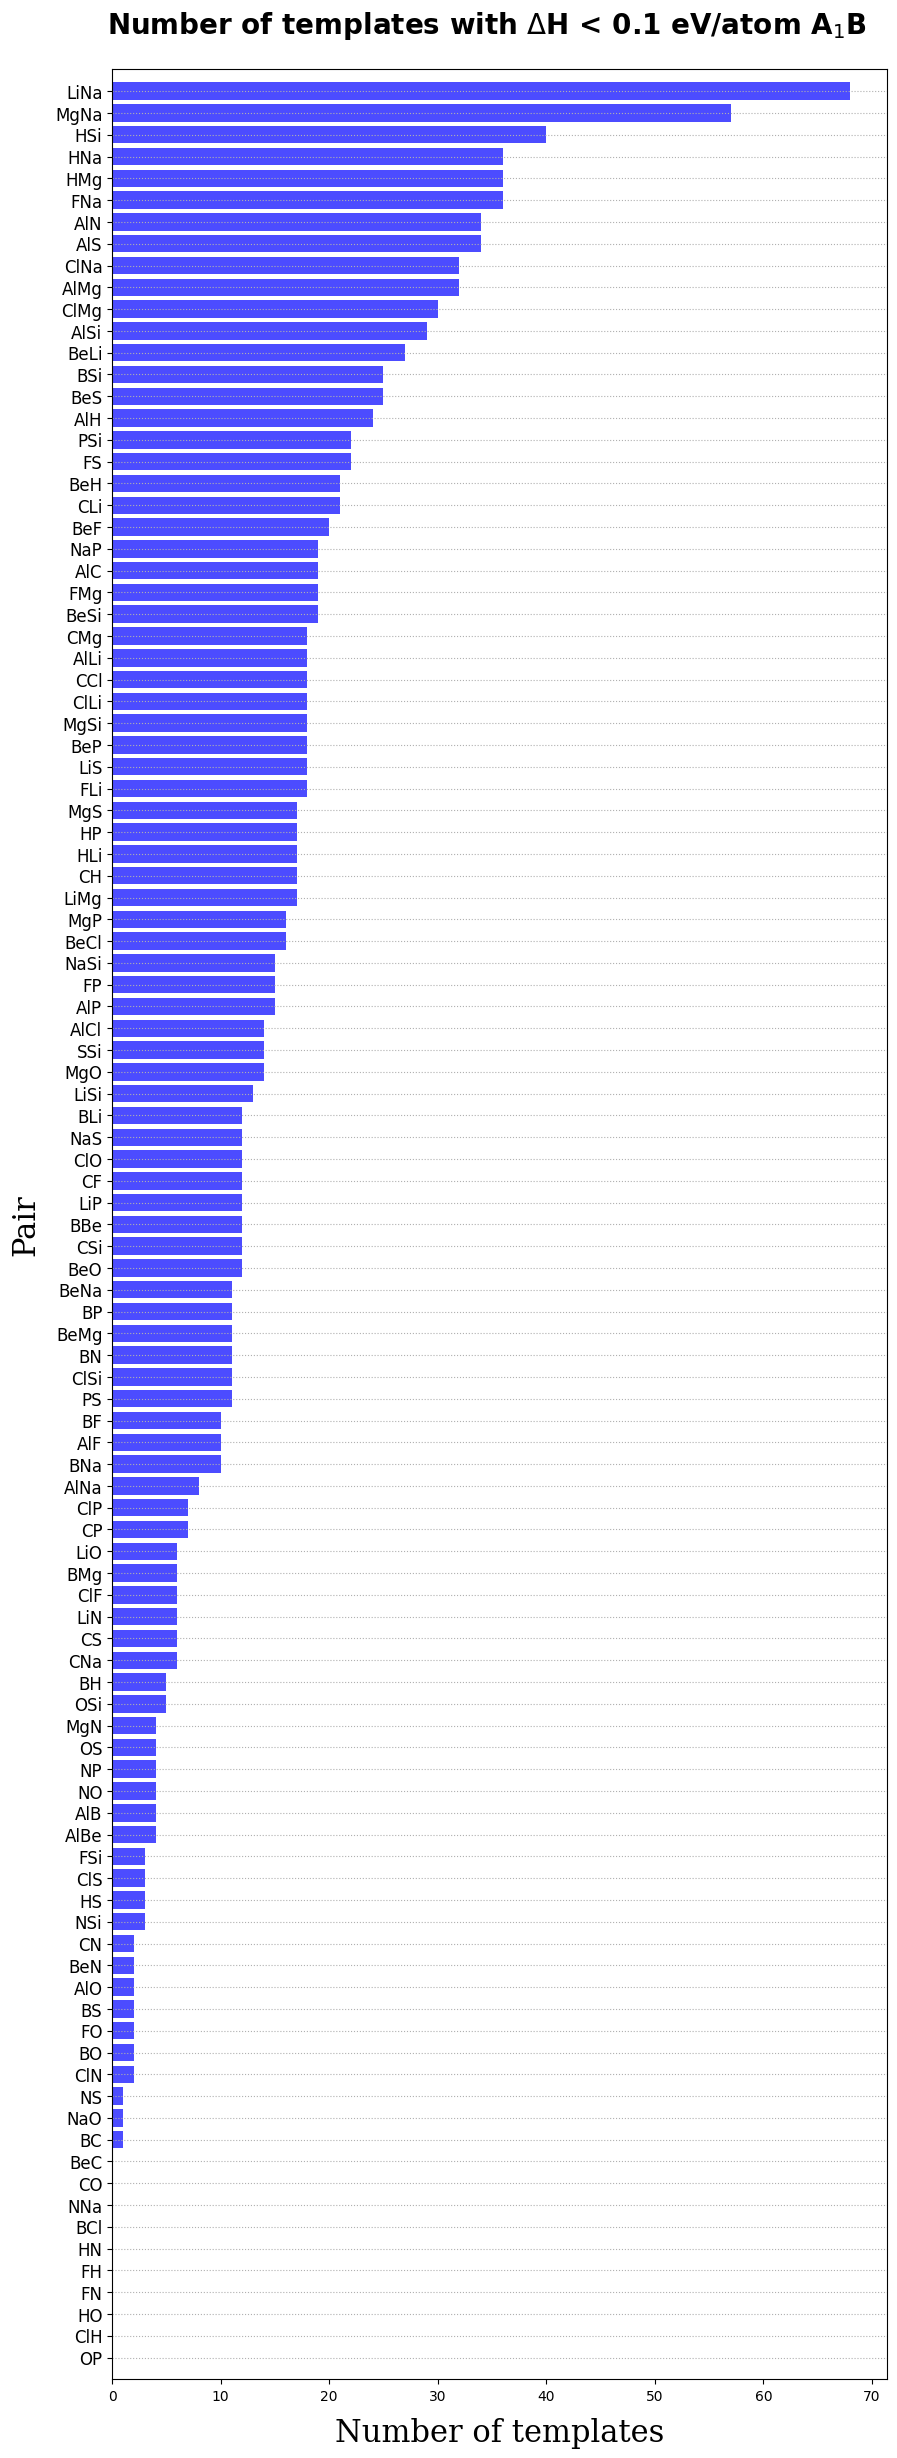

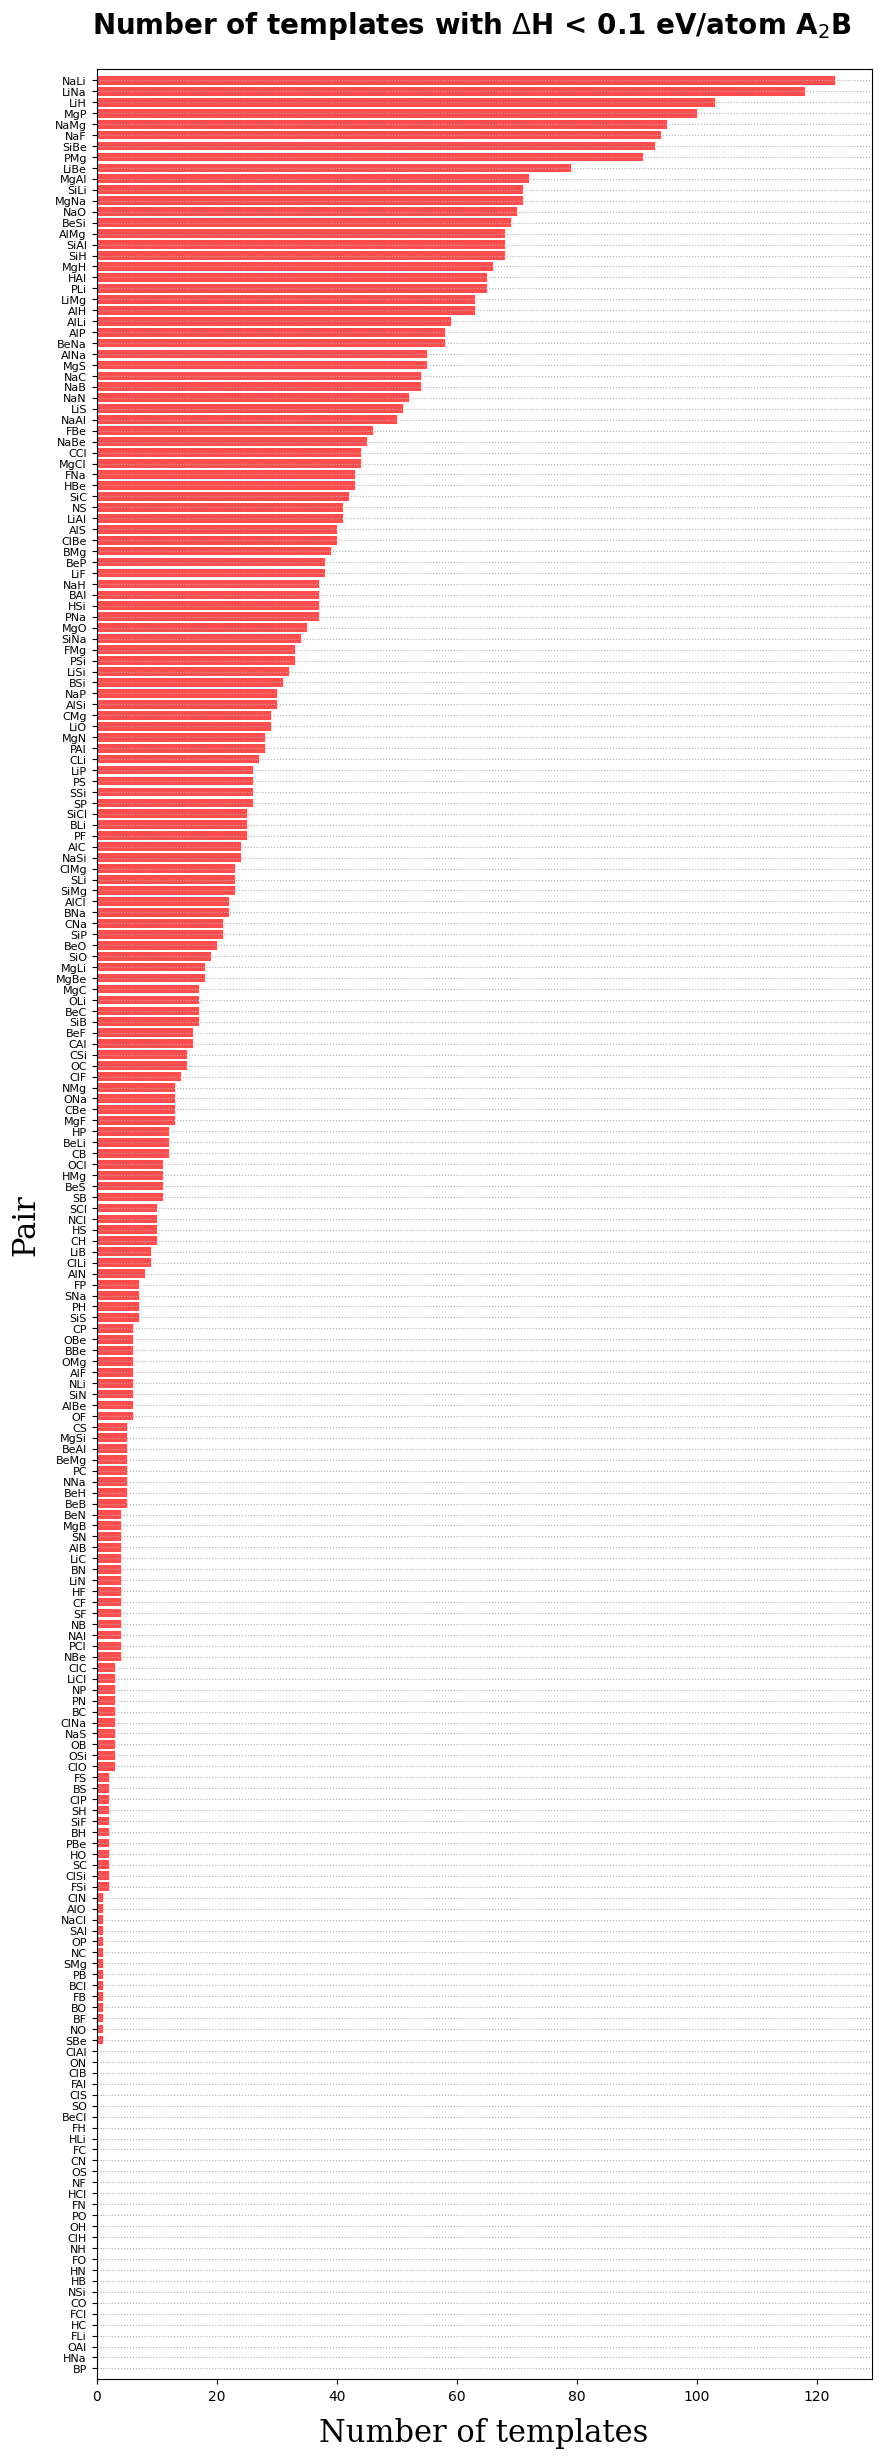

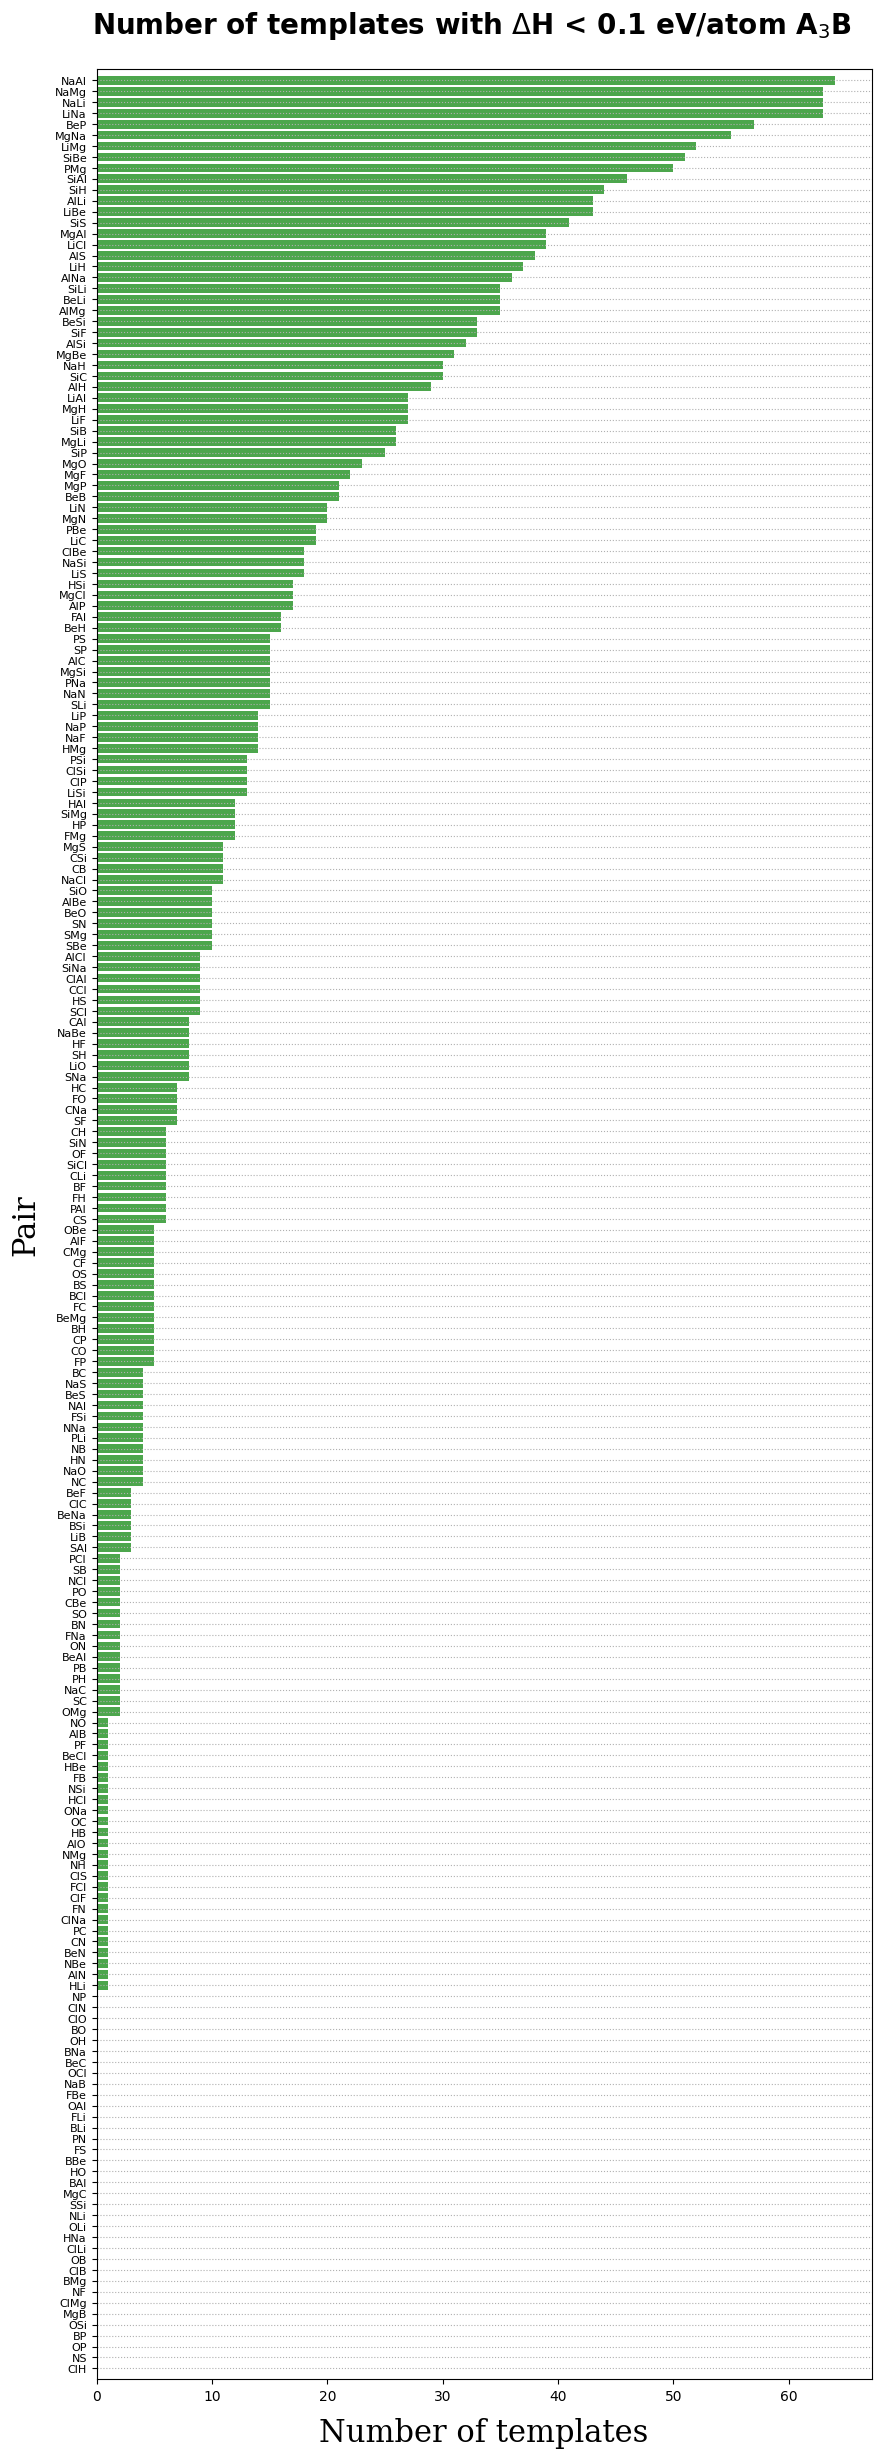

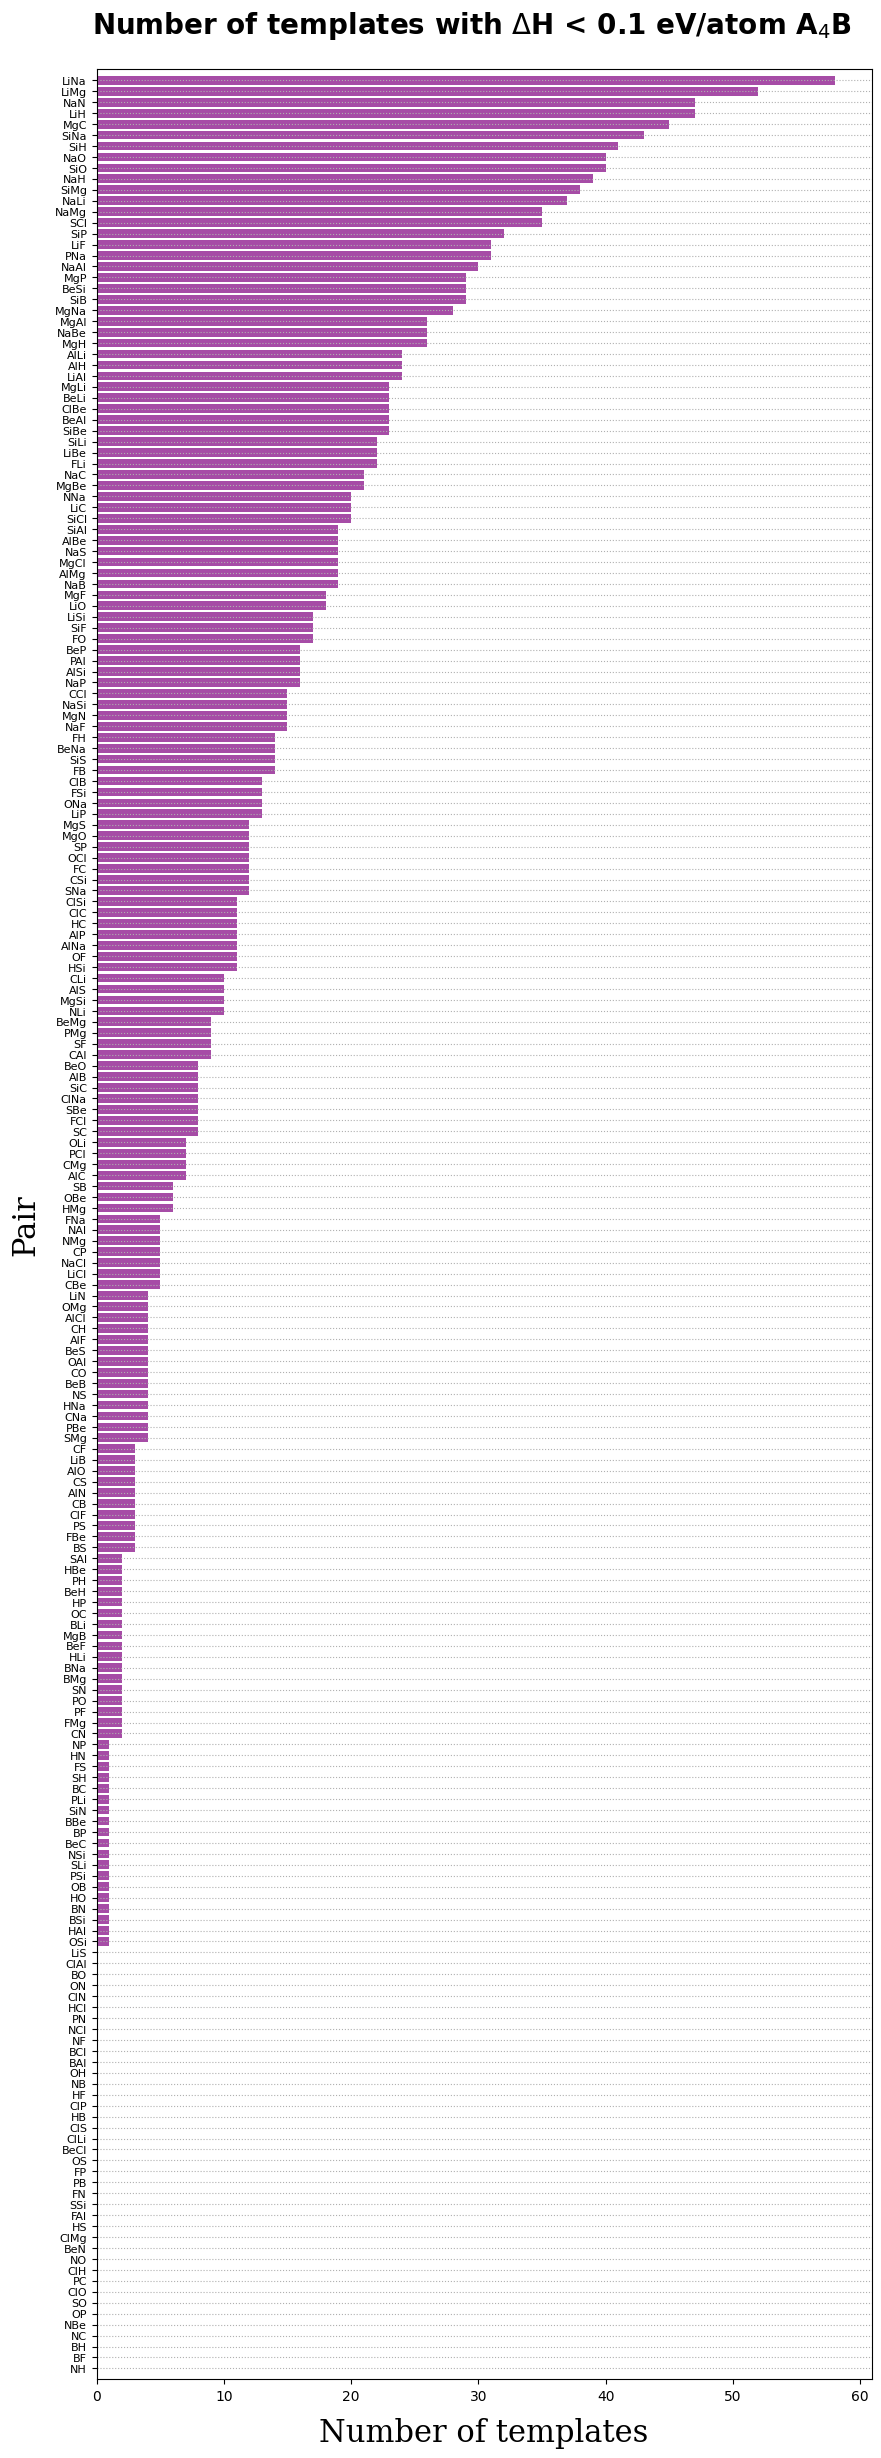

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list

# Carica i dati
with open('ENTHALPY/EntGS.json', 'r') as f:
    gs_dict = json.load(f)

elements = ['H', 'Li', 'O', 'Na', 'N', 'Mg', 'Si', 'S', 'Be', 'B', 'Al', 'C', 'F', 'P', 'Cl']

color_list = ['blue', 'red', 'green', 'purple']

for idx, comp in enumerate(gs_dict.keys()):
    if comp in ['6']:
        continue

    pair_count_dict = {}
    with open(f'ENTHALPY/A{comp}B.json', 'r') as f:
        data_ent = json.load(f)
    
    for pair in data_ent.keys():
        pair_count_dict[pair] = 0
        for temp in data_ent[pair].keys():
            if data_ent[pair][temp] - gs_dict[comp][pair] < 0.1:
                pair_count_dict[pair] += 1

    sorted_items = sorted(pair_count_dict.items(), key=lambda x: x[1])  
    sorted_keys, sorted_values = zip(*sorted_items)  # Divide in due liste ordinate

    fig, ax = plt.subplots(1, 1, figsize=(10, 30))
    title = r'Number of templates with $\Delta$H < 0.1 eV/atom' + f' A$_{comp}$B'
    fig.suptitle(title, fontsize=20, y=0.9, fontweight='bold')
    
    ax.barh(sorted_keys, sorted_values, color=color_list[idx], alpha=0.7)
    ax.set_xlabel(r'Number of templates', fontsize=22, labelpad=10, family='serif')

    ax.set_ylim(-1, len(pair_count_dict.keys()))
    ax.set_ylabel('Pair', fontsize=22, labelpad=10, family='serif')
    ax.set_yticks(range(len(sorted_keys)))
    fontsize = 12
    if comp != '1':
        fontsize = 8
    ax.set_yticklabels([f'{i}' for i in sorted_keys], fontsize=fontsize)


    ax.grid(True, ls=':', axis='y')

    

    plt.show()


### CREATE CRITICAL PAIRS DICT

In [5]:
import json
import matplotlib.pyplot as plt
import networkx as nx

# Carica i dati
def load_json(filepath):
    with open(filepath, 'r') as f:
        return json.load(f)

gs_dict = load_json('ENTHALPY/EntGS.json')

# Inizializza la struttura dati per il grafo
compositions = []
pair_data = {}
filtered_pairs = {}

for comp in gs_dict.keys():
    
    if comp in ['6']:  # Escludi la composizione 6
        continue
    
    filtered_pairs[comp] = {}
    pair_count_dict = {}
    data_ent = load_json(f'ENTHALPY/A{comp}B.json')
    
    for pair in data_ent.keys():
        pair_count_dict[pair] = sum(1 for temp in data_ent[pair] if data_ent[pair][temp] - gs_dict[comp][pair] < 0.1)
    
    filtered_pairs[comp] = {pair: count for pair, count in pair_count_dict.items() if count < 1}

with open('CriticalPairs.json', 'w') as f:
    json.dump(filtered_pairs, f, indent=4)

#### PROVA DI GRAFICI

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list

# Carica i dati
with open('ENTHALPY/EntGS.json', 'r') as f:
    gs_dict = json.load(f)

elements = ['H', 'Li', 'O', 'Na', 'N', 'Mg', 'Si', 'S', 'Be', 'B', 'Al', 'C', 'F', 'P', 'Cl']


for comp in gs_dict.keys():
    if comp in ['6']:
        continue

    pair_count_dict = {}
    with open(f'ENTHALPY/A{comp}B.json', 'r') as f:
        data_ent = json.load(f)
    
    for pair in data_ent.keys():
        pair_count_dict[pair] = 0
        for temp in data_ent[pair].keys():
            if data_ent[pair][temp] - gs_dict[comp][pair] < 0.3:
                pair_count_dict[pair] += 1


# Creazione della matrice
    matrix = np.zeros((len(elements), len(elements)))

    for idx_col, A in enumerate(elements):
        for idx_row, B in enumerate(elements):
            if A == B:
                continue
            pair = f'{A}{B}'
            matrix[idx_row, idx_col] = pair_count_dict.get(pair, 0 )
            if matrix[idx_row, idx_col] == 0:
                matrix[idx_row, idx_col] = pair_count_dict.get(f'{B}{A}', 0)

    # 🔹 Creazione della heatmap
    fig, ax = plt.subplots(figsize=(11, 10))
    title = r'Number of templates with $\Delta$H < 0.3 eV/atom' + f' A$_{comp}$B'
    fig.suptitle(title, fontsize=25, y=0.92, fontweight='bold')

    im = ax.imshow(matrix, cmap='coolwarm')

    # 🔹 Impostazioni degli assi
    ax.set_xlabel('A', fontsize=20, labelpad=10, family='serif')
    ax.set_ylabel('B', fontsize=20, labelpad=10, family='serif')
    ax.set_xticks(np.arange(len(elements)))
    ax.set_yticks(np.arange(len(elements)))
    ax.set_xticklabels(elements, fontsize=15, rotation=45)
    ax.set_yticklabels(elements, fontsize=15)

    # 🔹 Barra dei colori
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('Number of Templates', rotation=270, labelpad=28, fontsize=20)

    # 🔹 Annotazioni nei quadrati
    for i in range(len(elements)):
        for j in range(len(elements)):
            if i != j:
                ax.text(j, i, int(matrix[i, j]), ha='center', va='center', color='black', fontsize=15, fontweight='bold')

    plt.show()


225 225 225


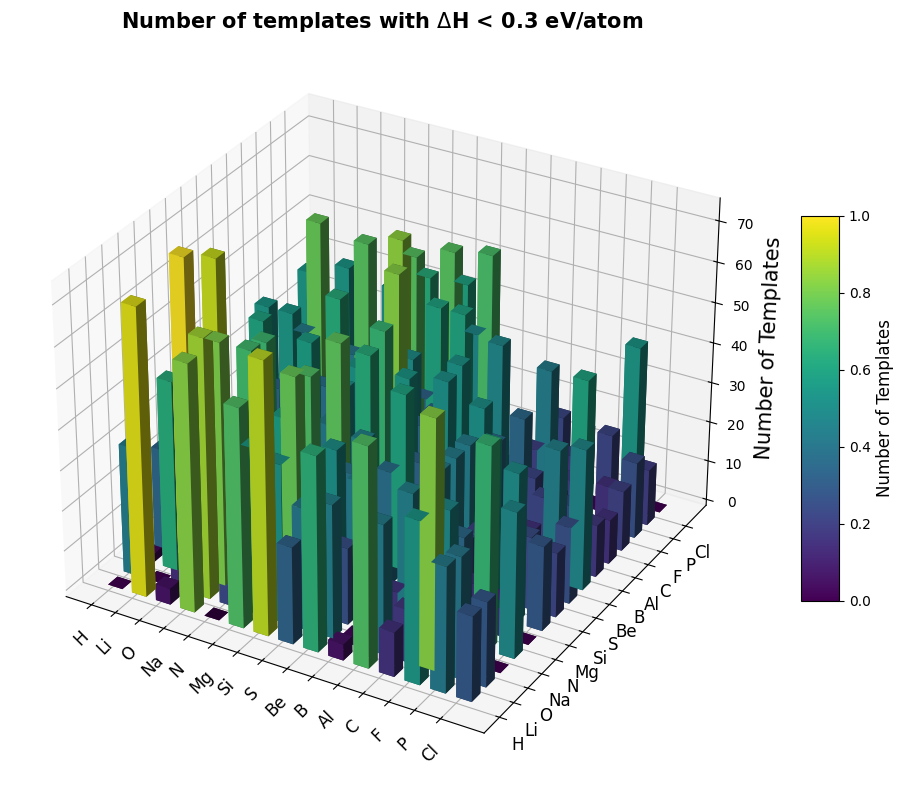

In [60]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Carica i dati
with open('ENTHALPY/EntGS.json', 'r') as f:
    gs_dict = json.load(f)

pair_count_dict = {}

for comp in gs_dict.keys():
    if comp in ['1', '6']:
        continue
    with open(f'ENTHALPY/A{comp}B.json', 'r') as f:
        data_ent = json.load(f)
    
    for pair in data_ent.keys():
        pair_count_dict[pair] = 0
        for temp in data_ent[pair].keys():
            if data_ent[pair][temp] - gs_dict[comp][pair] < 0.3:
                pair_count_dict[pair] += 1

# Lista degli elementi
elements = ['H', 'Li', 'O', 'Na', 'N', 'Mg', 'Si', 'S', 'Be', 'B', 'Al', 'C', 'F', 'P', 'Cl']

# Creazione delle coordinate per il grafico 3D
x_pos = []
y_pos = []
z_pos = np.zeros(len(elements) * len(elements))  # Tutte le barre partono da z=0
values = []

for idx_col, A in enumerate(elements):
    for idx_row, B in enumerate(elements):

        pair = f'{A}{B}'
        x_pos.append(idx_col)
        y_pos.append(idx_row)
        values.append(pair_count_dict.get(pair, 0))  # Se il pair non esiste, assegna 0


# Converti in array numpy
x_pos = np.array(x_pos)
y_pos = np.array(y_pos)
values = np.array(values)

# Creazione della figura
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Larghezza delle barre
dx = dy = 0.6  

# Color mapping in base ai valori
colors = plt.cm.viridis(values / max(values) if max(values) > 0 else values)

# Creazione del bar plot 3D
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, values, shade=True, color=colors)

# Impostazioni degli assi
ax.set_xticks(range(len(elements)))
ax.set_yticks(range(len(elements)))
ax.set_xticklabels(elements, fontsize=12, rotation=45)
ax.set_yticklabels(elements, fontsize=12)
ax.set_zlabel('Number of Templates', fontsize=15)

# Titolo
ax.set_title(r'Number of templates with $\Delta$H < 0.3 eV/atom', fontsize=15, fontweight='bold')

# Aggiunta della barra colori
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Number of Templates', fontsize=12)

plt.show()


# TRENDS WITHOUT CRITICAL PAIRS

### PRODUCTION OF DATA

In [7]:
from template_csp import managetemp_withdict as mt
import json
import os
import numpy as np

from tqdm import tqdm

test_elements = ['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']

hyperparameters = { 
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "comp" : 1,
    "lev_red" : 0.9,
    "n_pairs" : 105,

    "n_final_templates" : 1
}


complist = [1, 2, 3, 4] 
initlist = [86, 156, 92, 79] # 86 
mother_dir = './HvsINIT/'
path_to_critical_pairs = 'CriticalPairs.json'

for comp in complist:
    dir_comp = mother_dir + f'{comp}/'
    means = np.zeros(initlist[complist.index(comp)])
    stds = np.zeros(initlist[complist.index(comp)])

    for size_initial in tqdm(range(1, initlist[complist.index(comp)]+1)):
        dir_init = dir_comp + f'{size_initial}/'
        errors_bef = np.zeros(20)

        
        for step in range(0,20):
            file_restart = dir_init + f'TemplateSet_{step}'

            initial_set = mt.TemplateSet(test_elements=test_elements, hyperparameters=hyperparameters, restart_file=file_restart, comp = comp)
            errors_bef[step] = initial_set.err_before(path_to_critical_pairs)

        means[size_initial-1] = np.mean(errors_bef)
        stds[size_initial-1] = np.std(errors_bef)

        if size_initial == 1:
            with open(dir_comp + 'BeforeNoCritical0.csv', 'w') as f:
                f.write(f'{size_initial-1},{means[size_initial-1]},{stds[size_initial-1]}\n')
        else:
            with open(dir_comp + 'BeforeNoCritical0.csv', 'a') as f:
                f.write(f'{size_initial-1},{means[size_initial-1]},{stds[size_initial-1]}\n')
        




    


100%|██████████| 79/79 [00:29<00:00,  2.67it/s]


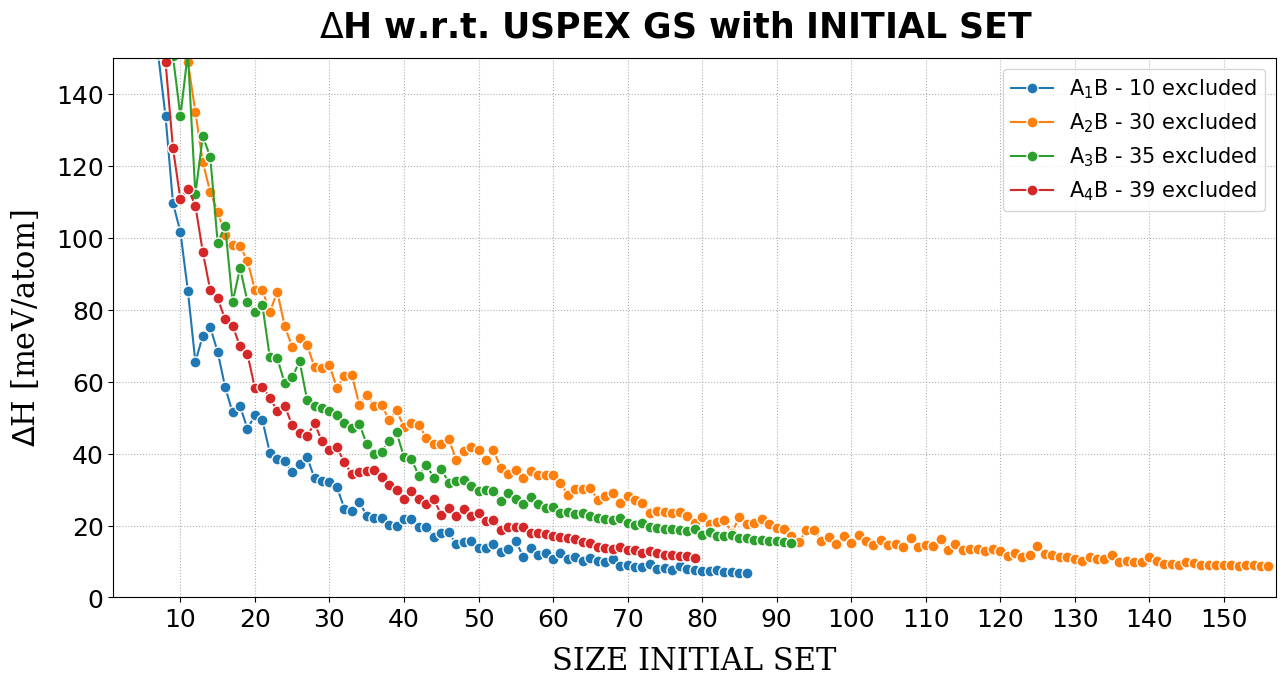

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

mother_dir = './HvsINIT/'

crit_pairs = {}
with open('CriticalPairs.json', 'r') as f:
    crit_pairs = json.load(f)


title = r'$\Delta$H w.r.t. USPEX GS with INITIAL SET'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=25, y=0.95, fontweight='bold')
max_x_ticks = np.array([])

complist = [1,2,3,4]
for comp in complist:
    dir_name = f'{comp}'
    df_tot = pd.read_csv(mother_dir + f'{dir_name}/BeforeNoCritical0.csv', header=None, na_filter=False, index_col = 0)
    tot = (df_tot.to_numpy()).T * 1000

    x = np.arange(1, len(tot[0])+1) 

    ax.plot(x, tot[0] , marker = 'o', markeredgecolor='white', markersize=8, label=f'A$_{comp}$B - {len(crit_pairs[f"{comp}"])} excluded')
    max_x_ticks = np.append(max_x_ticks, len(tot[0]))


ax.set_ylabel(r'$\Delta$H [meV/atom]', fontsize=22, labelpad=10, family='serif')
step = 20
y_ticks  = np.arange(0,150,step, dtype=float)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'{i:.0f}' for i in y_ticks], fontsize=18)
ax.set_ylim(0,150)

ax.set_xlabel('SIZE INITIAL SET', fontsize=22, labelpad=10, family='serif')
xticks = np.arange(0, max(max_x_ticks)+1, 10)
ax.set_xticks(xticks)
ax.set_xlim(1,max(max_x_ticks)+1)
ax.set_xticklabels([f'{i:.0f}' for i in xticks], fontsize=18)

ax.grid(True, ls=':')
ax.legend(loc='upper right', fontsize=15)

plt.show()
fig.savefig('FIG/INIT_H_noCritical.png', bbox_inches="tight")


# OCCURRENCE, FORMATION ENT, LEV DIST

In [ ]:
from template_csp import managetemp as mte
import os
import numpy as np
import matplotlib.pyplot as plt

test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']
hyperparameters = {
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "lev_red" : 0.9
}
template_set = mte.TemplateSet(test_elements, './FULL5sets/20/TemplateSet_0')
pair_set = mte.PairSet(template_set, test_elements, './FULL5sets/20/PairSet_0')
lev_dist = pair_set.dist_matrix()

fig, (ax,ax1) = plt.subplots(1, 2, figsize=(20,14), width_ratios=[11, 12.2])
title = f'Initial Set'
ax.set_title(title, fontsize=22, y=1.02)
im = ax.imshow(lev_dist, cmap='plasma')
im.set_clim(0.7, 1)
ax.set_xticks(np.arange(len(template_set.couples)))
ax.set_yticks(np.arange(len(template_set.couples)))
ax.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax.set_yticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15)

reduction_set = pair_set.reduced_set(hyperparameters)
idx_to_remove = [i for i in range(len(template_set.couples)) if i not in reduction_set]
lev_dist = np.delete(lev_dist, idx_to_remove, axis=0)
lev_dist = np.delete(lev_dist, idx_to_remove, axis=1)
template_set.couples = [template_set.couples[i] for i in range(len(template_set.couples)) if i in reduction_set]

title = f'Final Set'
ax1.set_title(title, fontsize=22, y=1.02)
im = ax1.imshow(lev_dist, cmap='plasma')
im.set_clim(0.7, 1)
cbar = fig.colorbar(im, ax=ax1, orientation='vertical', fraction=0.046, pad=0.05, ticks = np.arange(0, 1.1, 0.1)) 
ax1.set_xticks(np.arange(len(template_set.couples)))
ax1.set_yticks(np.arange(len(template_set.couples)))
ax1.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax1.set_yticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15)
plt.show()
fig.savefig('LevDistMat.png', bbox_inches="tight")

In [ ]:
from template_csp import managetemp as mte
import os
import numpy as np
import matplotlib.pyplot as plt

test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']
hyperparameters = {
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "lev_red" : 0.9
}
template_set = mte.TemplateSet(test_elements, './RANDOM/FULL5sets/20/TemplateSet_0')
pair_set = mte.PairSet(template_set, test_elements, './RANDOM/FULL5sets/20/PairSet_0')
formation_enthalpy = pair_set.formation_percentage()

fig, (ax,ax1) = plt.subplots(1, 2, figsize=(20,6), sharey=True)

title = f'Initial Set'
ax.set_title(title, fontsize=22, y=1.02)
ax.bar(np.arange(len(template_set.couples)), np.zeros(len(template_set.couples))+1, color='grey', edgecolor='black', label='Formation Enthalpy > 0')
ax.bar(np.arange(len(template_set.couples)), formation_enthalpy, color='lightgreen', edgecolor='black', label='Formation Enthalpy < 0')

ax.set_xticks(np.arange(len(template_set.couples)))
ax.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax.legend(fontsize=15)
ax.grid(True, ls=':', axis='y', color='black')

ax.set_ylabel('% of all compounds', fontsize=22)
ax.yaxis.set_label_coords(-0.10, 0.5)
yticks = np.arange(0,1.1,0.1)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{int(i*100)}%' for i in yticks], fontsize=15)

reduction_set = pair_set.reduced_set(hyperparameters)
idx_to_remove = [i for i in range(len(template_set.couples)) if i not in reduction_set]
template_set.couples = [template_set.couples[i] for i in range(len(template_set.couples)) if i in reduction_set]
formation_enthalpy = np.delete(formation_enthalpy, idx_to_remove)

title = f'Final Set'
ax1.set_title(title, fontsize=22, y=1.02)
ax1.bar(np.arange(len(template_set.couples)), np.zeros(len(template_set.couples))+1, color='grey', edgecolor='black', label='Formation Enthalpy < 0')
ax1.bar(np.arange(len(template_set.couples)), formation_enthalpy, color='lightgreen', edgecolor='black', label='Formation Enthalpy > 0')

ax1.set_xticks(np.arange(len(template_set.couples)))
ax1.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax1.legend(fontsize=15)
ax1.grid(True, ls=':', axis='y', color='black')


fig.subplots_adjust(wspace=0.01)
plt.show()
fig.savefig('FormationEnt.png', bbox_inches="tight")

In [ ]:
from template_csp import managetemp as mte
import os
import numpy as np
import matplotlib.pyplot as plt

test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']
hyperparameters = {
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "lev_red" : 0.9
}
template_set = mte.TemplateSet(test_elements, './FULL5sets/20/TemplateSet_0')
pair_set = mte.PairSet(template_set, test_elements, './FULL5sets/20/PairSet_0')
isto = pair_set.template_gs()

fig, (ax,ax1) = plt.subplots(1, 2, figsize=(20,6), sharey=True)

title = f'Initial Set'
ax.set_title(title, fontsize=22, y=1.02)
ax.bar(np.arange(len(template_set.couples)), isto, color='crimson', edgecolor='black', alpha=0.8)

ax.set_xticks(np.arange(len(template_set.couples)))
ax.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax.grid(True, ls=':', axis='y', color='black')

ax.set_ylabel('Lowest Energy template', fontsize=22)
ax.yaxis.set_label_coords(-0.07, 0.5)
yticks = np.arange(0,25,2)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=15)

reduction_set = pair_set.reduced_set(hyperparameters)
idx_to_remove = [i for i in range(len(template_set.couples)) if i not in reduction_set]
template_set.couples = [template_set.couples[i] for i in range(len(template_set.couples)) if i in reduction_set]
isto = np.delete(isto, idx_to_remove)

title = f'Final Set'
ax1.set_title(title, fontsize=22, y=1.02)
ax1.bar(np.arange(len(template_set.couples)), isto, color='crimson', edgecolor='black', alpha=0.8)

ax1.set_xticks(np.arange(len(template_set.couples)))
ax1.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax1.grid(True, ls=':', axis='y', color='black')

fig.subplots_adjust(wspace=0.01)
plt.show()
fig.savefig('Occurrence.png', bbox_inches="tight")